Considere uma cadeia unidimensional composta por N átomos, todos com a mesma massa m, conectados por molas que alternam entre duas constantes elásticas: k e três vezes k. O sistema deve ser analisado sob condições de contorno com pontas livres, ou seja, as extremidades da cadeia não estão presas.

In [3]:
%pip install tqdm

import numpy as np
from numpy import array 
from scipy.linalg import eigh 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time 

Note: you may need to restart the kernel to use updated packages.


![alt text](../v6akm862.png)

In [7]:
#================================ Condições Iniciais =====================================
m=1.0 #Massa dos atomos
k= 1 #Constante de mola do primeiro oscilador #Constante de mola do segundo oscilador
N= 100 #Número de atomos 

In [8]:
# Matriz de massa
M = m * np.eye(N)

#=========================================== Caso Molas Iguais (k) ===========================================
# Vetor de constantes das molas (todas iguais a k)
k_springs_equal = [k] * (N - 1)
# Construir matriz de rigidez K1 (tridiagonal simétrica)
K1 = np.zeros((N, N))
# Diagonal principal
K1[0, 0] = k_springs_equal[0]                       # Primeiro átomo
K1[-1, -1] = k_springs_equal[-1]                     # Último átomo
for i in range(1, N - 1):
    K1[i, i] = k_springs_equal[i - 1] + k_springs_equal[i] 
# Subdiagonal e superdiagonal
for i in range(N - 1):
    K1[i, i + 1] = -k_springs_equal[i]                # Superdiagonal
    K1[i + 1, i] = -k_springs_equal[i] 
                  
# Resolver problema de autovalor
autovalores1, autovetores1 = eigh(K1, M)
frequencias1 = np.sqrt(np.abs(autovalores1))
idx1 = np.argsort(frequencias1)
frequencias_ordenadas1 = frequencias1[idx1]
autovetores_ordenados1 = autovetores1[:, idx1].real
autovetores_norm1 = autovetores_ordenados1 / np.linalg.norm(autovetores_ordenados1, axis=0)
#=========================================== Caso Molas Alternadas (k e 3k) ===================================
# Vetor de constantes das molas alternadas (k, 3k, k, 3k, ...)
k_springs_alt = [k if i % 2 == 0 else 3 * k for i in range(N - 1)]

# Construir matriz de rigidez K2 (tridiagonal simétrica)
K2 = np.zeros((N, N))
# Diagonal principal
K2[0, 0] = k_springs_alt[0]                         # Primeiro átomo
K2[-1, -1] = k_springs_alt[-1]                       # Último átomo
for i in range(1, N - 1):
    K2[i, i] = k_springs_alt[i - 1] + k_springs_alt[i]  # Átomos internos
# Subdiagonal e superdiagonal
for i in range(N - 1):
    K2[i, i + 1] = -k_springs_alt[i]                 # Superdiagonal
    K2[i + 1, i] = -k_springs_alt[i]
            
# Resolver problema de autovalor
autovalores2, autovetores2 = eigh(K2, M)
frequencias2 = np.sqrt(np.abs(autovalores2))
idx2 = np.argsort(frequencias2)
frequencias_ordenadas2 = frequencias2[idx2]
autovetores_ordenados2 = autovetores2[:, idx2].real
autovetores_norm2 = autovetores_ordenados2 / np.linalg.norm(autovetores_ordenados2, axis=0)

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
C:\Users\fiore\AppData\Local\Temp\ipykernel_8852\3970672762.py:7: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Densidade de estados por $\omega^2$')


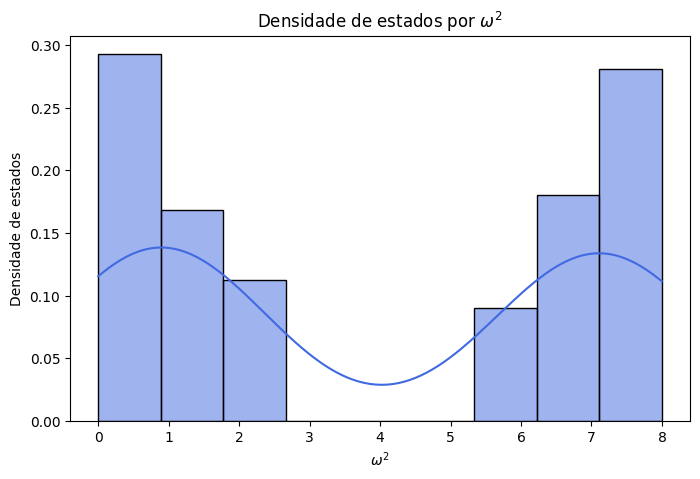

In [9]:
#=========================================== Plotando os resultados ===========================================
plt.figure(figsize=(8, 5))
omega2 = frequencias_ordenadas2**2
sns.histplot(omega2, bins=9, kde=True, stat='density', color='royalblue')
plt.xlabel(r'$\omega^2$')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados por $\omega^2$')
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
C:\Users\fiore\AppData\Local\Temp\ipykernel_9816\3149215736.py:7: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Densidade de estados por $\omega^2$')


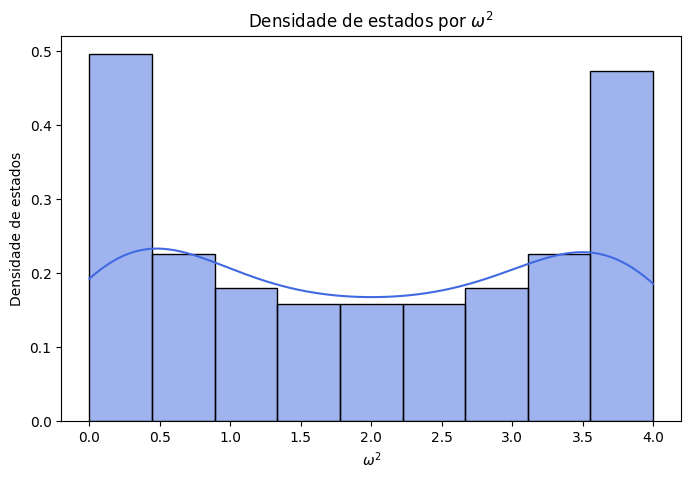

In [32]:
#=========================================== Plotando os resultados ===========================================
plt.figure(figsize=(8, 5))
omega1= frequencias_ordenadas1**2
sns.histplot(omega1, bins=9, kde=True, stat='density', color='royalblue')
plt.xlabel(r'$\omega^2$')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados por $\omega^2$')
plt.show()

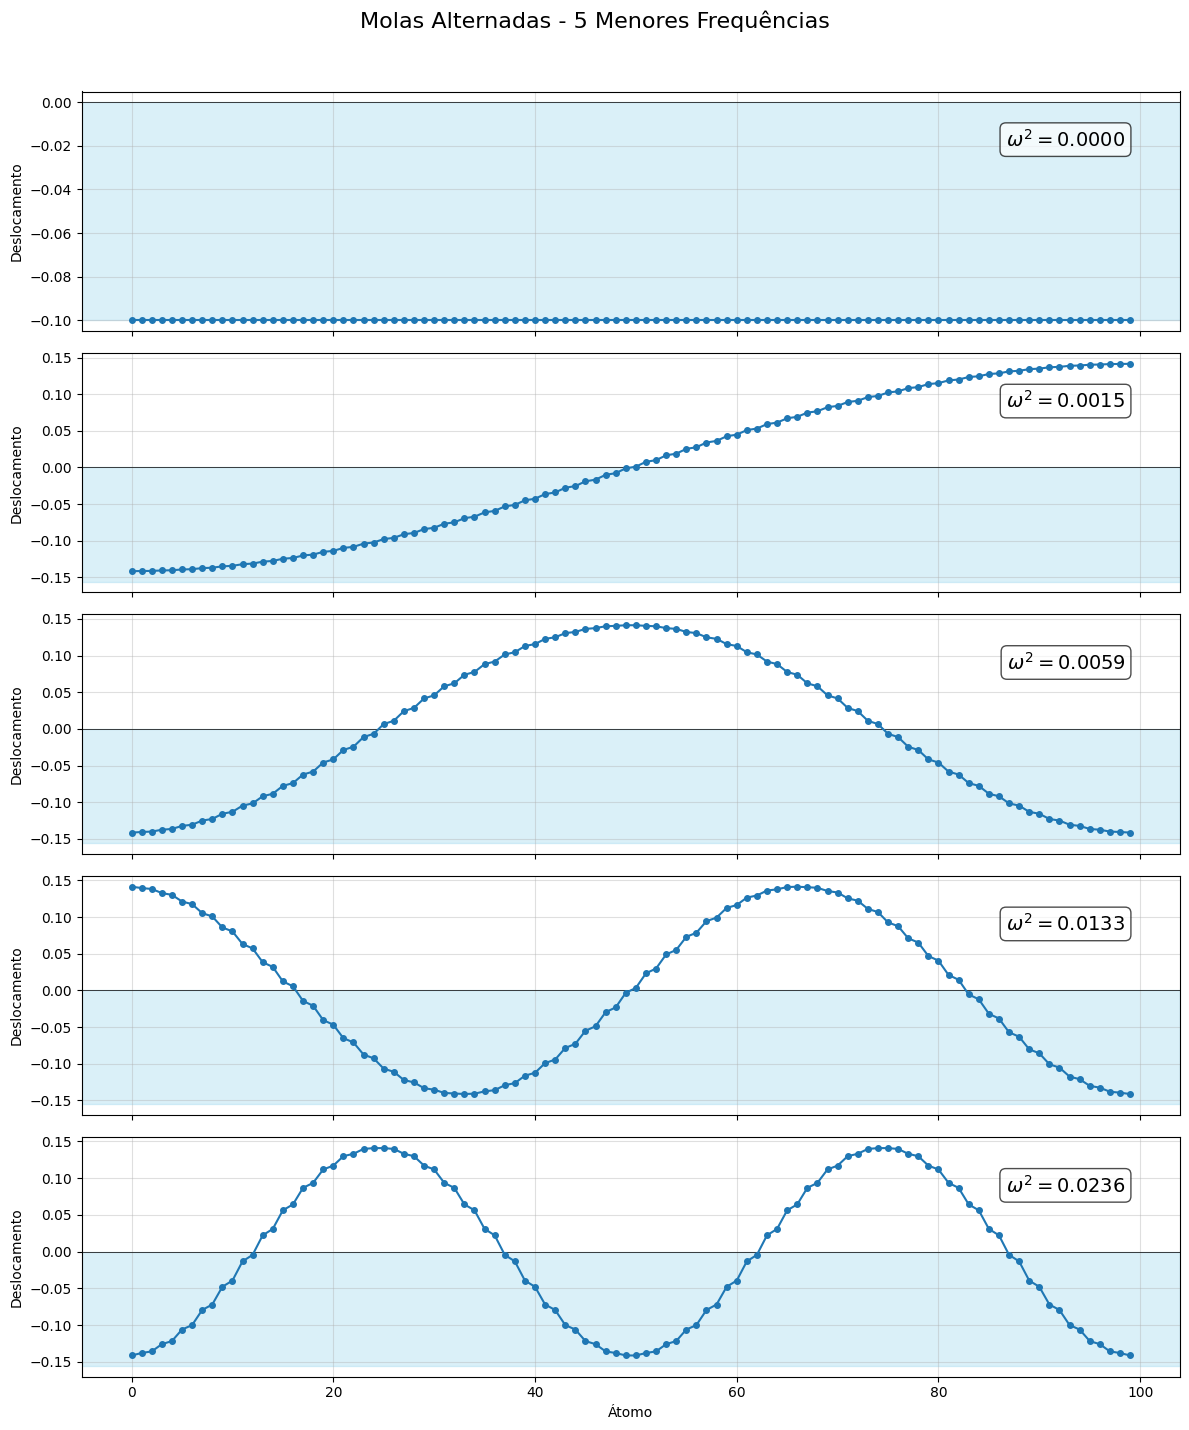

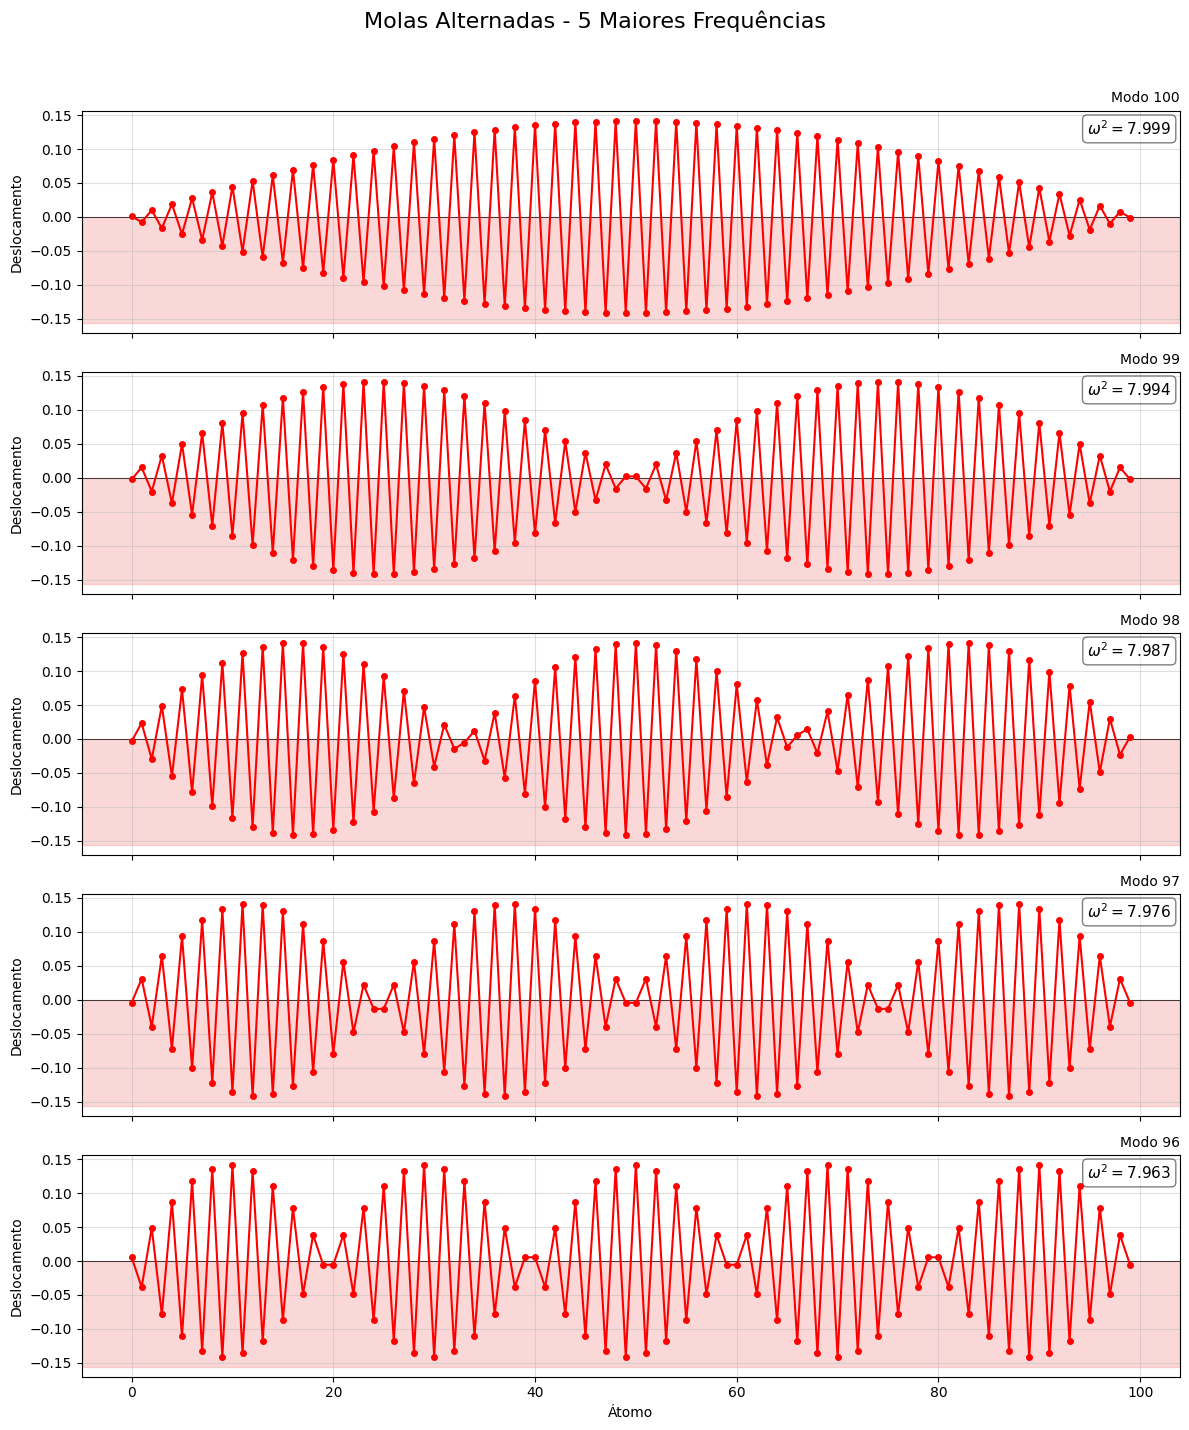

In [11]:
def plot_modos_aprimorado(autovetores, idx, title_prefix, N):

    # --- 1. GRÁFICO PARA AS 5 MENORES FREQUÊNCIAS ---
    fig1, axes1 = plt.subplots(5, 1, figsize=(12, 15), sharex=True)
    fig1.suptitle('Molas Alternadas - 5 Menores Frequências', fontsize=16, y=0.95)
    x_data = np.arange(N)

    for i in range(5):
        ax = axes1[i]
        mode_index = idx2[i]
        mode_data = autovetores2[:, mode_index]
        ax.plot(x_data, mode_data, 'o-', markersize=4, label=f'Modo {i+1}', zorder=10)
        ymin, _ = ax.get_ylim()

        ax.axhspan(ymin, 0, color='skyblue', alpha=0.3, zorder=0)
        ax.set_ylabel('Deslocamento')
        ax.grid(True, alpha=0.4)
        ax.axhline(0, color='black', linewidth=0.5)
        
        ax.text(0.95, 0.77, f'$\\omega^2 = {autovalores2[mode_index]:.4f}$', 
                transform=ax.transAxes, fontsize=14, ha='right',
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

    axes1[-1].set_xlabel('Átomo')
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

    # --- 2. GRÁFICO PARA AS 5 MAIORES FREQUÊNCIAS ---
    fig2, axes2 = plt.subplots(5, 1, figsize=(12, 15), sharex=True)
    fig2.suptitle('Molas Alternadas - 5 Maiores Frequências', fontsize=16, y=0.95)

    for i in range(5):
        ax = axes2[i]
        mode_index = idx2[-(i + 1)] 
        mode_number = N - i
        mode_data = autovetores2[:, mode_index]
        ax.plot(x_data, mode_data, 'o-', markersize=4, color='red', zorder=10)
        ymin, _ = ax.get_ylim()

        ax.text(0.992, 0.89, f'$\\omega^2 = {autovalores2[mode_index]:.3f}$', 
                transform=ax.transAxes, fontsize=11, ha='right',
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.5))

        ax.axhspan(ymin, 0, color='lightcoral', alpha=0.3, zorder=0)
        ax.set_ylabel('Deslocamento')
        ax.grid(True, alpha=0.4)
        ax.axhline(0, color='black', linewidth=0.5)
        ax.set_title(f'Modo {mode_number}', loc='right', fontsize=10)

    axes2[-1].set_xlabel('Átomo')
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()
plot_modos_aprimorado(autovetores_norm1, idx1, 'Molas Iguais (k)', N)


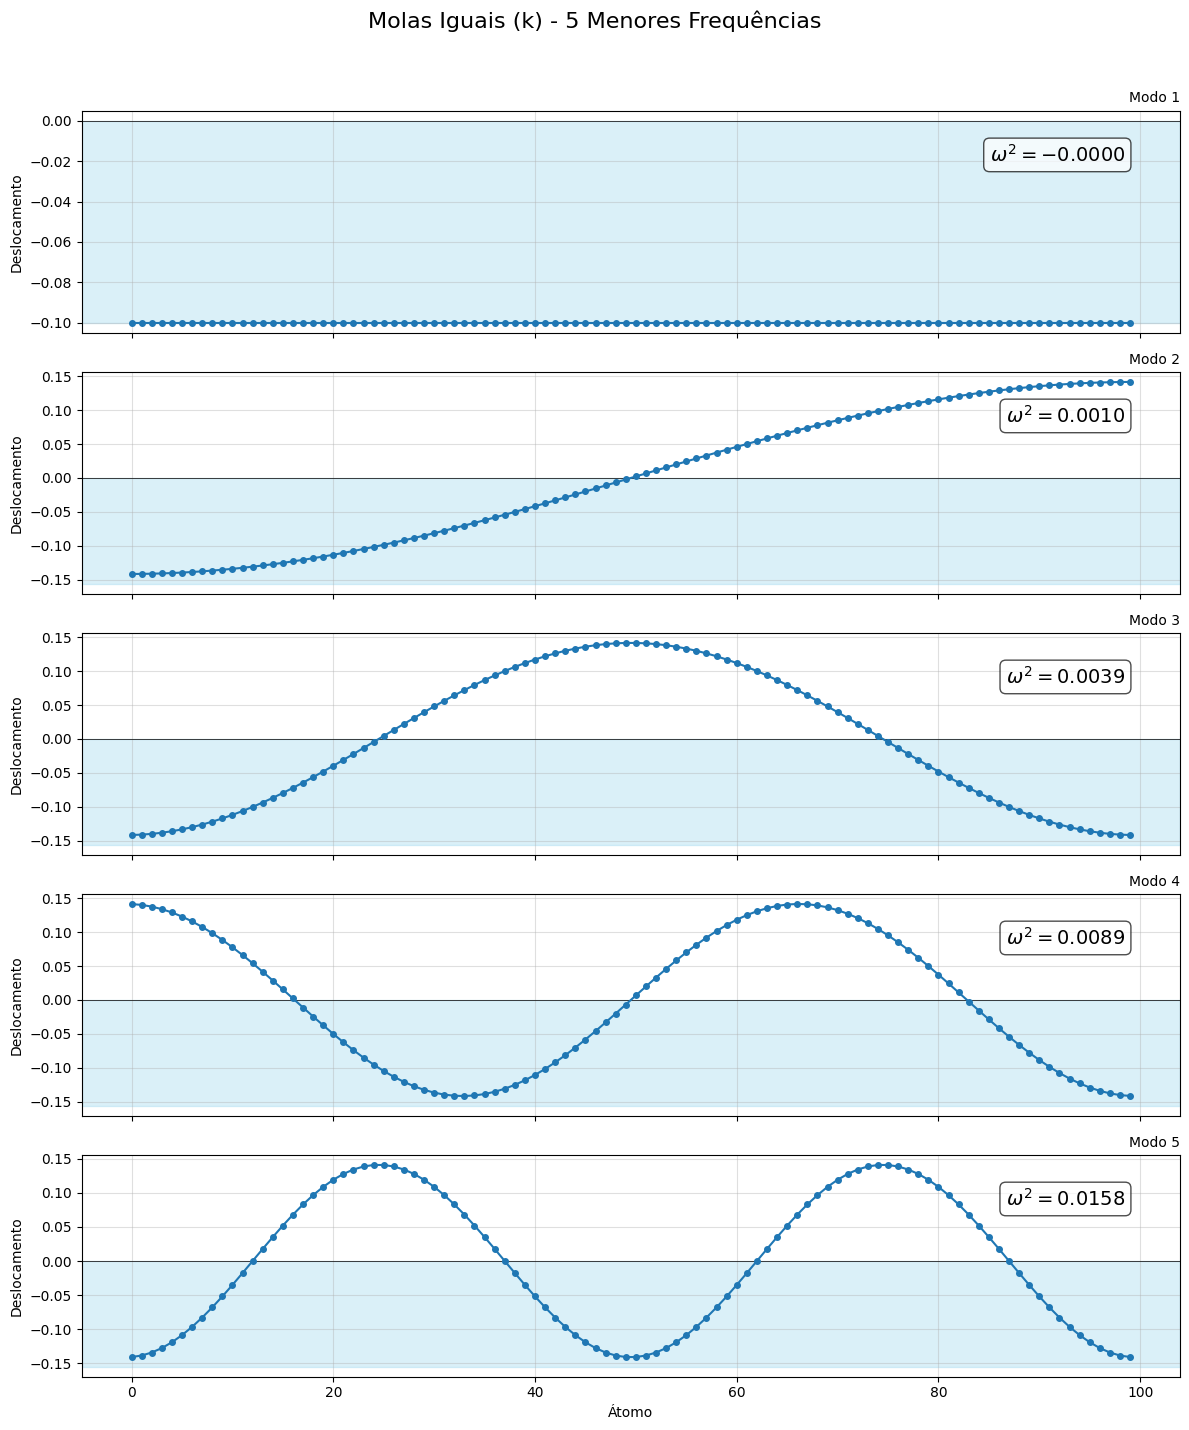

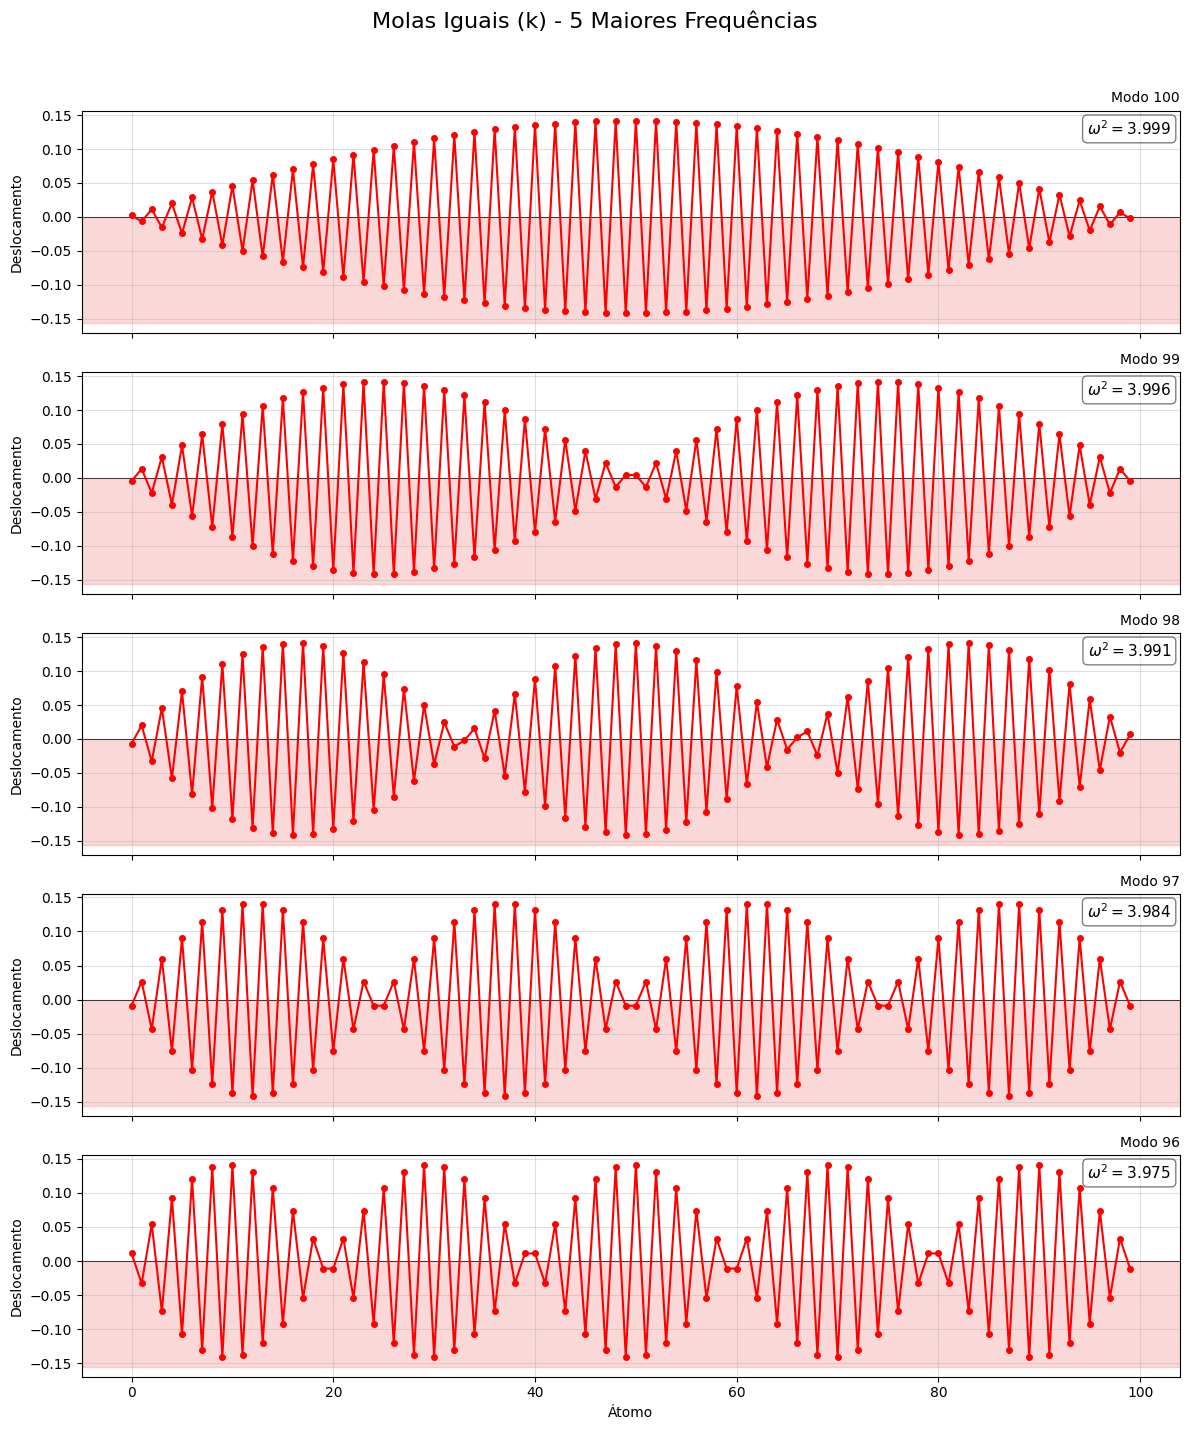

In [65]:
def plot_modos_aprimorado(autovetores, idx, title_prefix, N):

    # --- 1. GRÁFICO PARA AS 5 MENORES FREQUÊNCIAS ---
    fig1, axes1 = plt.subplots(5, 1, figsize=(12, 15), sharex=True)
    fig1.suptitle(f'{title_prefix} - 5 Menores Frequências', fontsize=16, y=0.95)
    x_data = np.arange(N)

    for i in range(5):
        ax = axes1[i]
        mode_index = idx1[i]
        mode_data = autovetores1[:, mode_index]
        ax.plot(x_data, mode_data, 'o-', markersize=4, label=f'Modo {i+1}', zorder=10)
        ymin, _ = ax.get_ylim()
        ax.axhspan(ymin, 0, color='skyblue', alpha=0.3, zorder=0)
        ax.set_ylabel('Deslocamento')
        ax.grid(True, alpha=0.4)
        ax.axhline(0, color='black', linewidth=0.5)
        ax.set_title(f'Modo {i+1}', loc='right', fontsize=10)
        
        ax.text(0.95, 0.77, f'$\\omega^2 = {autovalores1[mode_index]:.4f}$', 
                transform=ax.transAxes, fontsize=14, ha='right',
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

    axes1[-1].set_xlabel('Átomo')
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

    # --- 2. GRÁFICO PARA AS 5 MAIORES FREQUÊNCIAS ---
    fig2, axes2 = plt.subplots(5, 1, figsize=(12, 15), sharex=True)
    fig2.suptitle(f'{title_prefix} - 5 Maiores Frequências', fontsize=16, y=0.95)

    for i in range(5):
        ax = axes2[i]
        mode_index = idx1[-(i + 1)] 
        mode_number = N - i
        mode_data = autovetores1[:, mode_index]
        ax.plot(x_data, mode_data, 'o-', markersize=4, color='red', zorder=10)
        ymin, _ = ax.get_ylim()

        ax.text(0.992, 0.89, f'$\\omega^2 = {autovalores1[mode_index]:.3f}$', 
                transform=ax.transAxes, fontsize=11, ha='right',
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.5))

        ax.axhspan(ymin, 0, color='lightcoral', alpha=0.3, zorder=0)
        ax.set_ylabel('Deslocamento')
        ax.grid(True, alpha=0.4)
        ax.axhline(0, color='black', linewidth=0.5)
        ax.set_title(f'Modo {mode_number}', loc='right', fontsize=10)

    axes2[-1].set_xlabel('Átomo')
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()
plot_modos_aprimorado(autovetores_norm1, idx1, 'Molas Iguais (k)', N)